In [3]:
import pandas as pd

In [4]:
# Charger le fichier CSV
df=pd.read_csv("whr_2015_2023.csv")

In [5]:
# Afficher les 5 premières lignes
df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


In [6]:
# Afficher les dimensions du dataset
df.shape

(1367, 10)

In [7]:
# Afficher la liste des noms des colonnes du dataset
df.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'year'],
      dtype='object')

In [8]:
# Afficher les types des variables
df.dtypes

country                          object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
year                              int64
dtype: object

In [9]:
# Informations sur les variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1367 non-null   object 
 1   region                        1367 non-null   object 
 2   happiness_score               1367 non-null   float64
 3   gdp_per_capita                1367 non-null   float64
 4   social_support                1367 non-null   float64
 5   healthy_life_expectancy       1366 non-null   float64
 6   freedom_to_make_life_choices  1367 non-null   float64
 7   generosity                    1367 non-null   float64
 8   perceptions_of_corruption     1366 non-null   float64
 9   year                          1367 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 106.9+ KB


In [10]:
# Vérification des valeurs manquantes
df.isnull().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       1
year                            0
dtype: int64

In [11]:
# Imputer les valeurs manquantes par la moyenne
df.fillna({'healthy_life_expectancy': df['healthy_life_expectancy'].mean()}, inplace=True)
df.fillna({'perceptions_of_corruption': df['perceptions_of_corruption'].mean()}, inplace=True)

In [12]:
df.isnull().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
dtype: int64

In [13]:
# Statistiques des variables numériques
df.drop(columns=["country", "region", "year"]).describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
count,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000
mean,5.441086,1.019422,1.045334,0.584043,0.450771,0.196260,0.132275
std,1.117909,0.453703,0.331163,0.245027,0.156733,0.113301,0.112514
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.599500,0.696326,0.832022,0.402554,0.356000,0.115000,0.056884
50%,5.440000,1.043000,1.083000,0.612448,0.467610,0.182700,0.097000
75%,6.256300,1.338473,1.299985,0.777602,0.568685,0.252858,0.165890
max,7.842000,2.209000,1.644000,1.141000,0.772000,0.838075,0.587000


In [14]:
# Statistiques des variables catégoriques
df.describe(include=['object'])

,country,region
count,1367,1367
unique,171,11
top,Cyprus,Sub-Saharan Africa
freq,11,337


In [15]:
# KPI 1: Dispersion du bonheur par année

# Calculer l'IQR du score de bonheur par année
happiness_iqr_year = (df.groupby("year")["happiness_score"].quantile(0.75)- df.groupby("year")["happiness_score"].quantile(0.25))
happiness_iqr_year = happiness_iqr_year.reset_index(name="IQR")
print(happiness_iqr_year)

   year      IQR
0  2015  1.71775
1  2016  1.86500
2  2017  1.59600
3  2018  1.71475
4  2019  1.64000
5  2020  1.50440
6  2021  1.40300
7  2022  1.41625
8  2023  1.61000


In [16]:
# KPI 2: Classement des pays (Top 10/Bottom 10)

# 1/ Calculer le score moyen du bonheur par pays
happiness_by_country = df.groupby("country")["happiness_score"].mean().reset_index()
print(happiness_by_country)

         country  happiness_score
0    Afghanistan         2.990767
1        Albania         4.893189
2        Algeria         5.409011
3         Angola         3.872250
4      Argentina         6.243522
..           ...              ...
166    Venezuela         5.304244
167      Vietnam         5.309500
168        Yemen         3.688925
169       Zambia         4.277378
170     Zimbabwe         3.630689

[171 rows x 2 columns]


In [17]:
# 2/ Top 10 des pays les plus heureux
top_10_countries = happiness_by_country.sort_values(by="happiness_score", ascending=False).head(10)
print(top_10_countries)

         country  happiness_score
49       Finland         7.662744
40       Denmark         7.579733
63       Iceland         7.522278
147  Switzerland         7.493322
112       Norway         7.473889
105  Netherlands         7.417100
146       Sweden         7.343500
106  New Zealand         7.273844
25        Canada         7.230456
6      Australia         7.227089


In [18]:
# 3/ Bottom 10 des pays les moins heureux
bottom_10_countries = happiness_by_country.sort_values(by="happiness_score", ascending=True).head(10)
print(bottom_10_countries)

                      country  happiness_score
0                 Afghanistan         2.990767
26   Central African Republic         3.202580
139               South Sudan         3.269320
22                    Burundi         3.277900
148                     Syria         3.292200
126                    Rwanda         3.398537
151                  Tanzania         3.536133
170                  Zimbabwe         3.630689
18                   Botswana         3.666878
168                     Yemen         3.688925


In [19]:
# KPI 3: Évolution du bonheur par année
happiness_by_year = df.groupby("year")["happiness_score"].mean()
print(happiness_by_year)

year
2015    5.375734
2016    5.382185
2017    5.354019
2018    5.375917
2019    5.407096
2020    5.473240
2021    5.532839
2022    5.553575
2023    5.539796
Name: happiness_score, dtype: float64


In [20]:
# KPI 4: Facteurs clés du bonheur (corrélation)
df_corr = df[[
    "happiness_score",
    "gdp_per_capita",
    "social_support",
    "healthy_life_expectancy",
    "freedom_to_make_life_choices",
    "perceptions_of_corruption"]]
correlation_matrix = df_corr.corr()
print(correlation_matrix)

                              happiness_score  gdp_per_capita  social_support  \
happiness_score                      1.000000        0.723810        0.648155   
gdp_per_capita                       0.723810        1.000000        0.522092   
social_support                       0.648155        0.522092        1.000000   
healthy_life_expectancy              0.682343        0.564938        0.561144   
freedom_to_make_life_choices         0.569458        0.439453        0.364927   
perceptions_of_corruption            0.414855        0.337407        0.147242   

                              healthy_life_expectancy  \
happiness_score                              0.682343   
gdp_per_capita                               0.564938   
social_support                               0.561144   
healthy_life_expectancy                      1.000000   
freedom_to_make_life_choices                 0.261369   
perceptions_of_corruption                    0.256171   

                              fr

In [21]:
# KPI 5: Écart Top 10 vs Bottom 10

# 1/ La moyenne du score de bonheur pour les Top 10 pays les plus heureux
top_10_countries_mean = top_10_countries["happiness_score"].mean()

# 2/ La moyenne du score de bonheur pour les Bottom 10 pays les moins heureux
bottom_10_countries_mean = bottom_10_countries["happiness_score"].mean()

# 3/ Calculer l’écart moyen Top vs Bottom
gap_top_bottom = top_10_countries_mean - bottom_10_countries_mean
print(gap_top_bottom)

4.027002632060913


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1200x600 with 0 Axes>

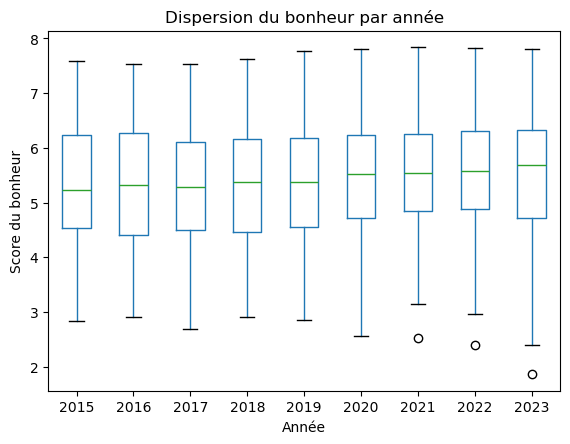

In [23]:
# Visualisation KPI 1: Dispersion du bonheur par année
plt.figure(figsize=(12,6))
df.boxplot(column="happiness_score", by="year", grid=False)
plt.title("Dispersion du bonheur par année")
plt.suptitle("")
plt.xlabel("Année")
plt.ylabel("Score du bonheur")
plt.show()

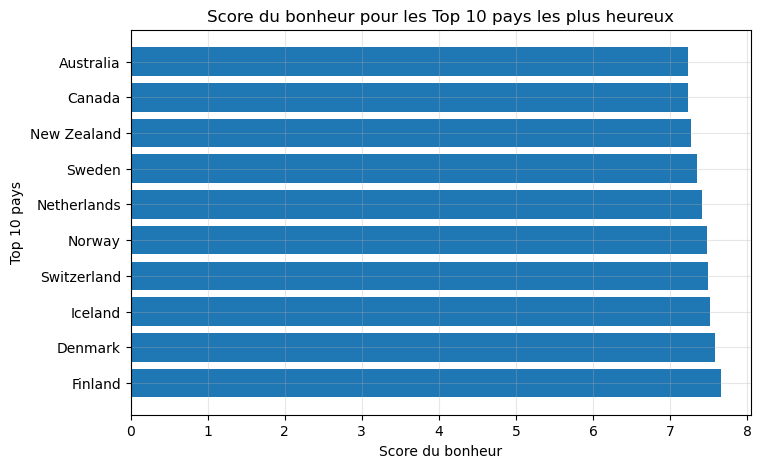

In [24]:
# Visualisation KPI 2: Classement des pays (Top 10/Bottom 10)

# Visualisation pour les Top 10 pays les plus heureux
plt.figure(figsize=(8,5))
plt.barh(top_10_countries["country"], top_10_countries["happiness_score"])
plt.title("Score du bonheur pour les Top 10 pays les plus heureux")
plt.xlabel("Score du bonheur")
plt.ylabel("Top 10 pays")
plt.grid(alpha=0.3)
plt.show()

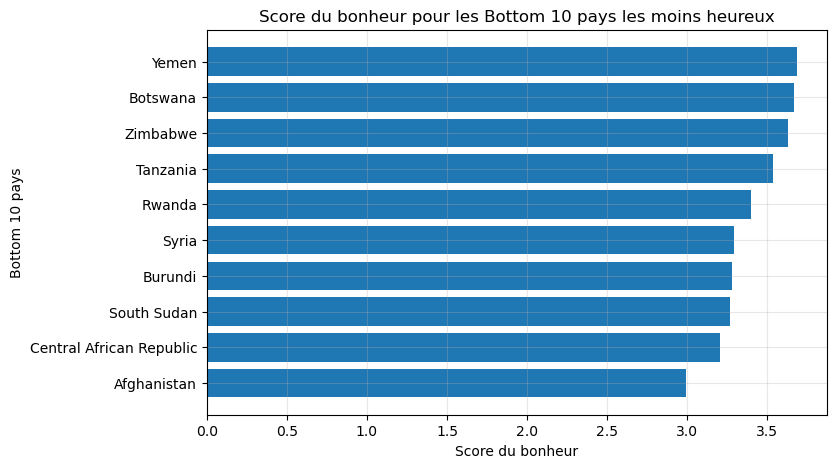

In [25]:
# Visualisation pour les Bottom 10 pays les moins heureux
plt.figure(figsize=(8,5))
plt.barh(bottom_10_countries["country"], bottom_10_countries["happiness_score"])
plt.title("Score du bonheur pour les Bottom 10 pays les moins heureux")
plt.xlabel("Score du bonheur")
plt.ylabel("Bottom 10 pays")
plt.grid(alpha=0.3)
plt.show()

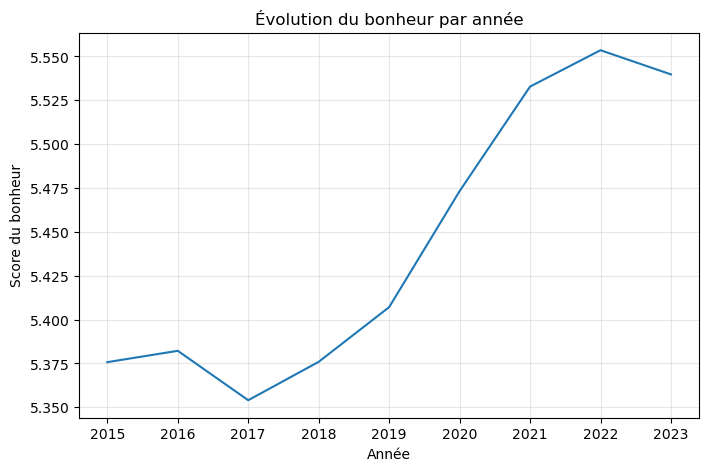

In [26]:
# Visualisation KPI 3: Évolution du bonheur par année
plt.figure(figsize=(8,5))
plt.plot(happiness_by_year.index, happiness_by_year.values)
plt.title("Évolution du bonheur par année")
plt.xlabel("Année")
plt.ylabel("Score du bonheur")
plt.grid(alpha=0.3)
plt.show()

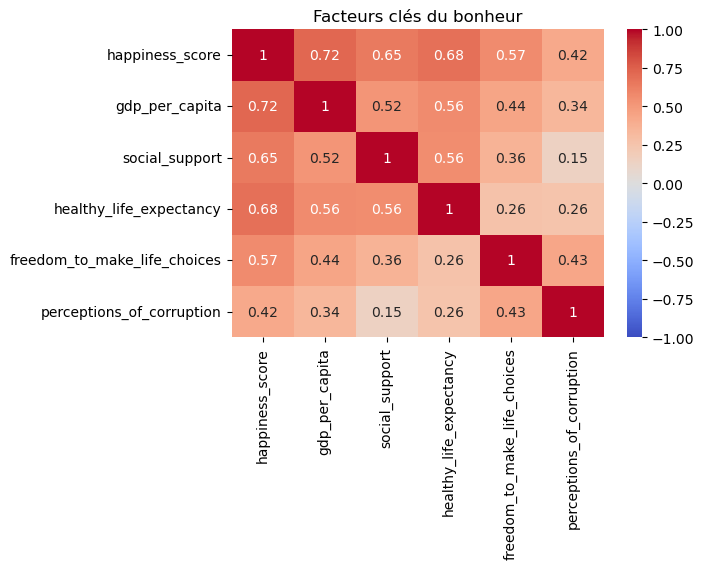

In [133]:
# Visualisation KPI 4: Facteurs clés du bonheur (corrélation)
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Facteurs clés du bonheur")
plt.show()

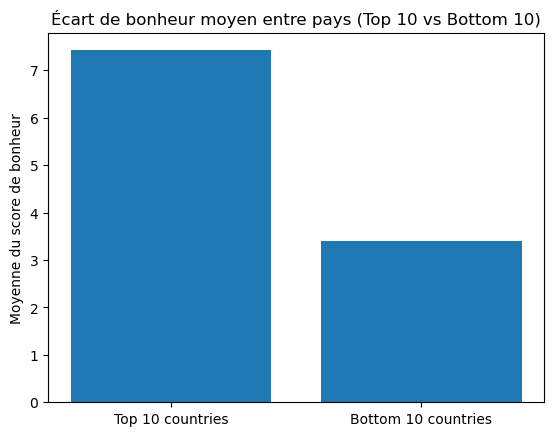

In [27]:
# Visualisation KPI 5: Écart Top 10 vs Bottom 10

# Préparation des données pour la nouvelle visualisation (en utilisant barplot)
groups = ["Top 10 countries", "Bottom 10 countries"]
mean_scores = [top_10_countries_mean , bottom_10_countries_mean ]

# Visualisation
plt.figure()
plt.bar(groups, mean_scores)
plt.ylabel("Moyenne du score de bonheur")
plt.title("Écart de bonheur moyen entre pays (Top 10 vs Bottom 10)")
plt.show()

In [28]:
# Pour une interprétation plus approfondie (utiliser range plot)

# 1/ Préparation des données pour le range plot
range_data = pd.DataFrame({
    "country": list(bottom_10_countries["country"]) + list(top_10_countries["country"]),
    "happiness_score": list(bottom_10_countries["happiness_score"]) + list(top_10_countries["happiness_score"]),
    "group": ["Bottom 10"] * len(bottom_10_countries) + ["Top 10"] * len(top_10_countries)
})
print(range_data)

                     country  happiness_score      group
0                Afghanistan         2.990767  Bottom 10
1   Central African Republic         3.202580  Bottom 10
2                South Sudan         3.269320  Bottom 10
3                    Burundi         3.277900  Bottom 10
4                      Syria         3.292200  Bottom 10
5                     Rwanda         3.398537  Bottom 10
6                   Tanzania         3.536133  Bottom 10
7                   Zimbabwe         3.630689  Bottom 10
8                   Botswana         3.666878  Bottom 10
9                      Yemen         3.688925  Bottom 10
10                   Finland         7.662744     Top 10
11                   Denmark         7.579733     Top 10
12                   Iceland         7.522278     Top 10
13               Switzerland         7.493322     Top 10
14                    Norway         7.473889     Top 10
15               Netherlands         7.417100     Top 10
16                    Sweden   

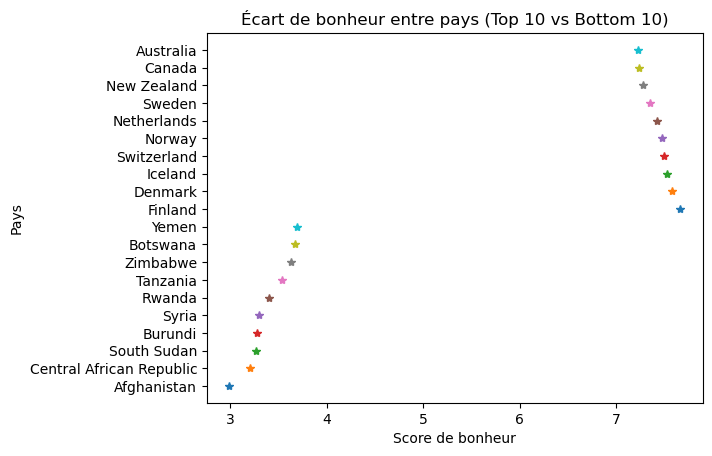

In [136]:
# 2/ Visualisation
plt.figure()
for country in range_data["country"]:
    subset = range_data[range_data["country"] == country]
    plt.plot(
        subset["happiness_score"],
        subset["country"],
        marker="*"
    )
plt.title("Écart de bonheur entre pays (Top 10 vs Bottom 10)")
plt.xlabel("Score de bonheur")
plt.ylabel("Pays")
plt.show()